# The development in key expense figures in Denmark over the last 10 years

# Introduction

We will in this project give a brief overview of the development in key expense figures accross municipalities in Denmark covering the period from 2008 - 2018. First we will look at the development in the long term debt in each municipality, but we will extend it to cover a broader range of expense figures later in the project. 

In [1]:
# Import varios packages used in the Project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fetching data from Statistics Denmark using an API
import pydst
import ipywidgets as widgets # Import a package for interactive plots
dst = pydst.Dst(lang='da')

In [2]:
# Import data from excel
#raw download from DST
# note: the file must be in a sub folder "data" to the folder where jupyter was launched
import os 
os.listdir('./data/')
# define filename refering to the path of the file.
filename = './Data/NGLK1.xlsx' # Data for long-term debt ('Gæld')
filename2 = './Data/FOLK1A.xlsx' # Population data.
filename3 = './Data/NGLK2.xlsx' # Data for Operating expenses ('Driftudgifter')

# Read and clean data - Part 1

## Debt Data

In [3]:
# A quick overview of the data
pd.read_excel(filename).head(10)

,"Udvalgte kommunale regnskabstal efter prisenhed, brutto-/nettoudgifter, nøgletal, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Enhed: kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
2,Faste priser,Nettoudgifter,Langfristet gæld pr. indbygger,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
3,NaN,NaN,NaN,Region Hovedstaden,17825.0,17065.0,17171.0,15715.0,15319.0,15046.0,14463.0,13623.0,13111.0,12164.0,11644.0
4,NaN,NaN,NaN,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
5,NaN,NaN,NaN,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
6,NaN,NaN,NaN,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
7,NaN,NaN,NaN,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0
8,NaN,NaN,NaN,Albertslund,18424.0,17985.0,21608.0,21485.0,20686.0,19455.0,18901.0,18499.0,25241.0,24523.0,25570.0
9,NaN,NaN,NaN,Ballerup,17584.0,17122.0,19601.0,18737.0,17730.0,16078.0,15465.0,14510.0,13826.0,13064.0,12826.0


**Read the data for long term debt in the municipalities** in ``NGLK1.xlsx`` and **clean it** removing and renaming columns:

In [4]:
# Getting the right columns and rows

#a) Skip first 3 rows
debt = pd.read_excel(filename, skiprows=2)
debt.head(10)

# b) The first couple of columns are not needed and contain only missing values (denoted by NaN (Not a Number)), so we will drop those.
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
debt.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made


# c) We rename the first column 'Unnamed: 3'
debt.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
debt.head(10)



,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
1,Region Hovedstaden,17825.0,17065.0,17171.0,15715.0,15319.0,15046.0,14463.0,13623.0,13111.0,12164.0,11644.0
2,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
3,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
4,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
5,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0
6,Albertslund,18424.0,17985.0,21608.0,21485.0,20686.0,19455.0,18901.0,18499.0,25241.0,24523.0,25570.0
7,Ballerup,17584.0,17122.0,19601.0,18737.0,17730.0,16078.0,15465.0,14510.0,13826.0,13064.0,12826.0
8,Brøndby,12950.0,12119.0,13404.0,14888.0,15024.0,15117.0,14482.0,13785.0,12012.0,11111.0,9589.0
9,Gentofte,8719.0,7971.0,8322.0,8365.0,7895.0,12398.0,16949.0,18037.0,18377.0,19440.0,19351.0


We also see that the long-term debt. pr. capita in 2008 has been named 2008. Having a variable that is named a number can cause problems with some functions, so we change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2018} to {debt2008, ..., debt2018}.

In [5]:
myDict = {}
for i in range(2008, 2019): # range goes from 2008 to but not including 2019
    myDict[str(i)] = f'debt{i}' 

# Rename columns
debt.rename(columns = myDict, inplace=True)
debt.head(10)

,municipality,debt2008,debt2009,debt2010,debt2011,debt2012,debt2013,debt2014,debt2015,debt2016,debt2017,debt2018
0,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
1,Region Hovedstaden,17825.0,17065.0,17171.0,15715.0,15319.0,15046.0,14463.0,13623.0,13111.0,12164.0,11644.0
2,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
3,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
4,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
5,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0
6,Albertslund,18424.0,17985.0,21608.0,21485.0,20686.0,19455.0,18901.0,18499.0,25241.0,24523.0,25570.0
7,Ballerup,17584.0,17122.0,19601.0,18737.0,17730.0,16078.0,15465.0,14510.0,13826.0,13064.0,12826.0
8,Brøndby,12950.0,12119.0,13404.0,14888.0,15024.0,15117.0,14482.0,13785.0,12012.0,11111.0,9589.0
9,Gentofte,8719.0,7971.0,8322.0,8365.0,7895.0,12398.0,16949.0,18037.0,18377.0,19440.0,19351.0


**Remove all rows which are not municipalities, but keep whole country**:

Now we choose to drop observations that are not actually municipalities, but we still wish to keep the observations for the whole country for comparison.

The dataset contains observations like "Region Hovedstaden", which is not a municipality, so we want to drop such rows. To do this, we can use the df['var'].str functionalities, in particular df['var'].str.contains('PATTERN'). These rows are then deleted.

In [6]:
for val in ['Region', 'Landsdel']: 
    I = debt.municipality.str.contains(val)
    debt = debt.loc[I == False] # keep everything else
debt.head(5)

,municipality,debt2008,debt2009,debt2010,debt2011,debt2012,debt2013,debt2014,debt2015,debt2016,debt2017,debt2018
0,Hele landet,16644.0,16414.0,16762.0,16299.0,16353.0,16472.0,16222.0,15818.0,15394.0,14625.0,14099.0
2,København,12106.0,10394.0,9873.0,6426.0,5672.0,4969.0,4376.0,3738.0,3260.0,2771.0,2680.0
3,Frederiksberg,28300.0,27436.0,26173.0,25347.0,23146.0,22280.0,20491.0,18645.0,17191.0,15361.0,15255.0
4,Dragør,16222.0,16075.0,16858.0,20079.0,23060.0,26820.0,26019.0,23852.0,22101.0,18164.0,17179.0
5,Tårnby,83.0,66.0,84.0,65.0,50.0,38.0,23.0,15.0,9.0,4.0,1.0


**Convert the dataset to long format**:

Transforming the data set from wide to long: In general, Pandas will assume that the variables in the wide format have a particular structure: namely they are of the form XPERIOD, where X is called the "stub". In our case, the variable names are e.g. debt2011, so the stub is 'debt' and the period (for that variable) is 2011. we also reset the index.

In [7]:
# a. convert to long and reset index
debt_long = pd.wide_to_long(debt, stubnames='debt', i='municipality', j='year').reset_index()

# b. show
debt_long.head()

,municipality,year,debt
0,Hele landet,2008,16644.0
1,København,2008,12106.0
2,Frederiksberg,2008,28300.0
3,Dragør,2008,16222.0
4,Tårnby,2008,83.0


In [8]:
# Creating a new column, which is identical to another column. (used for plotting below)
debt_long['municipality2']=debt_long['municipality']
debt_long.head(5)

,municipality,year,debt,municipality2
0,Hele landet,2008,16644.0,Hele landet
1,København,2008,12106.0,København
2,Frederiksberg,2008,28300.0,Frederiksberg
3,Dragør,2008,16222.0,Dragør
4,Tårnby,2008,83.0,Tårnby


## Population Data

Read the population data in FOLK1A.xlsx and clean it:

In [9]:
# a. load population data
pop = pd.read_excel(filename2, skiprows=2)

# b. rename columns
pop.rename(columns = {'Unnamed: 0':'municipality'}, inplace=True)

# c. remove non-municipalities, but keep whole country
for val in ['Region', 'Landsdel']: 
    I = pop.municipality.str.contains(val)
    pop = pop.loc[I == False] # keep everything else
    
#d. Rename columns

Dict1 = {}
for i in range(2008, 2019): # range goes from 2008 to but not including 2019
    Dict1[int(i)] = f'population{i}' 
pop.rename(columns = Dict1, inplace=True)

# e. convert to long and reset index
pop_long = pd.wide_to_long(pop, stubnames='population', i='municipality', j='year').reset_index()

# f. Creating a new column, which is identical to another column. (used for plotting below)
pop_long['municipality2']=pop_long['municipality']

# f. show
pop_long.head()


,municipality,year,population,municipality2
0,Hele landet,2008,5475791,Hele landet
1,København,2008,509861,København
2,Frederiksberg,2008,93444,Frederiksberg
3,Dragør,2008,13261,Dragør
4,Tårnby,2008,40016,Tårnby


## Operation Expenses

**Read the data for operting expenses in the municipalities** in ``NGLK2.xlsx`` and **clean it**

In [10]:
# a. load data for operating expenses
OP = pd.read_excel(filename3, skiprows=2)

# b. Drop three first columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
OP.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made

# c. rename columns
OP.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# d. remove non-municipalities.
for val in ['Region', 'Landsdel', 'Hele landet']: 
    I = OP.municipality.str.contains(val)
    OP = OP.loc[I == False] # keep everything else
    
# e. Rename columns
Dict2 = {}
for i in range(2008, 2019): # range goes from 2008 to but not including 2019
    Dict2[str(i)] = f'operating{i}' 
OP.rename(columns = Dict2, inplace=True)

# f. convert to long and reset index
OP_long = pd.wide_to_long(OP, stubnames='operating', i='municipality', j='year').reset_index()

# g. show
OP_long.head(10)

,municipality,year,operating
0,København,2008,58650.0
1,Frederiksberg,2008,50937.0
2,Dragør,2008,53904.0
3,Tårnby,2008,52568.0
4,Albertslund,2008,70085.0
5,Ballerup,2008,65830.0
6,Brøndby,2008,67322.0
7,Gentofte,2008,51140.0
8,Gladsaxe,2008,56858.0
9,Glostrup,2008,62041.0


## Explore data set - Part 1

In order to be able to get an overview of longterm debt pr. capita across municipalities, we  use the function df.describe() to get some simple summary statistics. Note that each observation (municipality) is weighted equally.

In [11]:
debt.describe().round(2)

,debt2008,debt2009,debt2010,debt2011,debt2012,debt2013,debt2014,debt2015,debt2016,debt2017,debt2018
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,18658.16,18536.37,19079.03,18926.02,19036.25,19261.79,19854.43,19520.00,18890.54,17947.05,17281.02
std,10847.31,10182.94,10843.48,10267.29,9833.88,9717.37,13720.32,14537.35,14131.73,13320.57,12840.25
min,83.00,66.00,84.00,65.00,50.00,38.00,23.00,15.00,9.00,4.00,1.00
25%,12919.50,12666.50,13281.00,13212.50,13578.00,13777.00,13568.00,13501.00,13009.50,12289.00,11745.50
50%,16518.00,17050.00,16684.00,17590.00,17396.00,17770.00,17648.00,17466.00,17095.00,15634.00,15696.00
75%,21476.00,22263.50,22194.50,21475.50,21632.50,22302.50,21602.00,21741.50,21164.50,20842.50,19669.00
max,91330.00,85709.00,91049.00,87179.00,83712.00,80931.00,119926.00,132008.00,128437.00,119185.00,114280.00


And to get a picture of only the mean debt pr. capita pr. year

In [12]:
debt.mean().round(2)

debt2008    18658.16
debt2009    18536.37
debt2010    19079.03
debt2011    18926.02
debt2012    19036.25
debt2013    19261.79
debt2014    19854.43
debt2015    19520.00
debt2016    18890.54
debt2017    17947.05
debt2018    17281.02
dtype: float64

We see from the summary statistics that the mean of the long-term debt accros municipalities have decreased marginally over the 10 years, but overall it has reamained rather constant. Highest in 2014 and lowest in 2018. We see that the minimum debt level has decreased from 83 in 2008 to 1.00 in 2018, while the standard deviation, i.e. the variance of the debt level has increased. Thus we witnessed a small drop in the overall debt level in the danish municipalities, but the variation in debt level has increased.

# Analysis - Part 1

The **Simple plot** of the debt level for one municipality is:

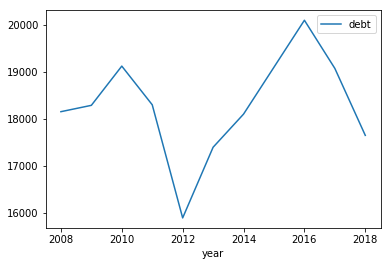

In [13]:
debt_long.loc[debt_long['municipality2'] == 'Køge', :].plot(x='year',y='debt'); 

However, we want to visually plot the same figure interactively for each municipality and compare them to the country as a whole. This is done below:

The **interactive plot** for both debt level and population are shown below by defining a function:

In [14]:
def plot_debt_pop(debt,population,dataset,municipality,municipality2): 
    """This function takes 5 arguments for plotting. It takes variables from two datasets"""
    
    if dataset == 'Debt':
        df = debt
        y = 'debt'
    else:
        df = population
        y = 'population'
        
    I = df['municipality'] == municipality
    J = df['municipality2'] == municipality2
    
#a. uses the dataframe's build in function for plotting

    ax_left = df.loc[I,:].plot(x='year', y=y, style='-o')
    ax_right = df.loc[J,:].plot(x='year', y=y, style='-o')
    
#b. Specifies the labels on the y-axis and the title
    ax_left.set_title('Development in variable')
    ax_right.set_ylabel('(Net) Long-term debt pr. capita (kr.)/ Population')
    ax_right.set_title('Development in variable')
    ax_right.set_ylabel('(Net) Long-term debt pr. capita (kr.)/ Population')

In [15]:
# Calls the function 'plot_debt_pop', and it's three adjustable widgets
widgets.interact(plot_debt_pop, 
    debt = widgets.fixed(debt_long),
    population = widgets.fixed(pop_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Debt','Population']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=debt_long.municipality.unique(),value='København'),
    municipality2 = widgets.Dropdown(description='Municipality2', 
                                    options=debt_long.municipality2.unique(),value='Albertslund')               
); 

interactive(children=(Dropdown(description='Dataset', options=('Debt', 'Population'), value='Debt'), Dropdown(…

As the above graph shows, it seems that the average long-term debt has decreased as suspected giving the simple descriptive statistics. Some municipalities (such as copenhagen) has experinced a rather smooth decrease, while Lejre has experinced a large decrease in 2012, and then a small increase afterwards. However by looking at different municipalities, we see that Dragør has experienced a reverse development, with a large increase up to 2012/2013 and then a large decrease. Alberslund has experinced and overall increase in long-term debt supporting the idea that large variation in each municipalities debt-level has maintained the average debt level fairly constant. Overall the population has increased in Denmark, but while Copenhagen has witnessed a rathor smooth population growth, Albertslund has witness more variation in the population growth.

To make the comparison easier, we will create a column below with the values for the whole country. Secondly, we will then make a plot, where we compare each municipality with the country average.

In [16]:
# Create a new column with only values for the Whole country to include in the above graphs for comparison;

#a) Define a new dataframe, where only the first entries/observation of a new year remains - namely the observation for the whole country.
newdebt_long=debt_long.drop_duplicates('year')

#b) Defines a new column 'Hele Landet' equal the Longterm debt for whole country. However, it will put NaN for non-first id rows:.
newdebt_long['Hele Landet'] = newdebt_long['debt']

# c) Merge the newdataframe with the original one to add a new column to 'debt_long' with only values for 'Hele landet'
newdebt_long = debt_long.merge(newdebt_long, how='outer')

#d) We change these NaN to previous values by following simple loop: 

tempval = 0   # a variable to store value temporarily
newy=[] # a emtpy list to intiate the process.
for x in newdebt_long['Hele Landet']: 
    if not pd.isnull(x): 
        tempval = x
    newy.append(tempval)
    
newdebt_long['Hele Landet'] = newy

newdebt_long.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,municipality,year,debt,municipality2,Hele Landet
0,Hele landet,2008,16644.0,Hele landet,16644.0
1,København,2008,12106.0,København,16644.0
2,Frederiksberg,2008,28300.0,Frederiksberg,16644.0
3,Dragør,2008,16222.0,Dragør,16644.0
4,Tårnby,2008,83.0,Tårnby,16644.0
5,Albertslund,2008,18424.0,Albertslund,16644.0
6,Ballerup,2008,17584.0,Ballerup,16644.0
7,Brøndby,2008,12950.0,Brøndby,16644.0
8,Gentofte,2008,8719.0,Gentofte,16644.0
9,Gladsaxe,2008,15269.0,Gladsaxe,16644.0


In [17]:
# creating the interactively plot where you can choose to look at two different municipalities compared to average level. 

# a. Define simple function;

def plot_e(dataframe, municipality,municipality2): 
    """This function takes three arguments, and returns a plot of the development in the long-term debt."""
    
    # i. set up for the two plots. 
    I = dataframe['municipality'] == municipality
    J = dataframe['municipality2'] == municipality2  
    ax_left=dataframe.loc[I,:].plot(x='year', style='-o', legend='False')
    ax_right=dataframe.loc[J,:].plot(x='year', style='-o', legend='False')
    
    # ii. Defines title and ylabel for the figure.
    ax_left.set_title('Long-term debt pr. capita in the municipality')
    ax_left.set_ylabel('Long-term debt pr. capita (kr.)')
    ax_right.set_title('(Net) Long-term debt pr. capita in the municipality')
    ax_right.set_ylabel('(Net) Long-term debt pr. capita (kr.)')
    
# b. We use the defined function plot_e from above.
widgets.interact(plot_e, 
    dataframe = widgets.fixed(newdebt_long),            
    municipality = widgets.Dropdown(description='Municipality1', options=newdebt_long.municipality.unique(), value='Køge'),
    municipality2 = widgets.Dropdown(description='Municipality2', options=newdebt_long.municipality2.unique(), value='Lejre')             
);

interactive(children=(Dropdown(description='Municipality1', index=31, options=('Hele landet', 'København', 'Fr…

## Summary on part 1

The graphs above gives a quick description of the development in the long-term debt pr. capita within each municipality. It shows that for the country as a whole the longterm debt pr. capita has been decreasing, but locally the picture is more diverse. For a more thorough/broader comparasion between the development in each munipilicatity, one could compare a broader set of key figures for each municipality. This is done below:

# Read and Clean data - part 2

We will in this part of the project download the table 'NGLK' using an API.

In [18]:
# Used for getting an overview of the variable names and their id.
indk_vars = dst.get_variables(table_id='NGLK')
indk_vars['values'][0][:13]

[{'id': '000', 'text': 'Hele landet'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '101', 'text': 'København'},
 {'id': '147', 'text': 'Frederiksberg'},
 {'id': '155', 'text': 'Dragør'},
 {'id': '185', 'text': 'Tårnby'},
 {'id': '165', 'text': 'Albertslund'},
 {'id': '151', 'text': 'Ballerup'},
 {'id': '153', 'text': 'Brøndby'},
 {'id': '157', 'text': 'Gentofte'},
 {'id': '159', 'text': 'Gladsaxe'},
 {'id': '161', 'text': 'Glostrup'},
 {'id': '163', 'text': 'Herlev'}]

**Read the data for key expense figures** in `NGLK` and **clean it** renaming columns:

In [19]:
# a) Download all of table NGLK for the whole country and get a quick overview;
nglk_true = dst.get_data(table_id = 'NGLK', variables={'OMRÅDE':['000'], 'BNØGLE':['*'], 'PRISENHED':['*'], 'TID':['*']})
nglk_true.head(10)

#b) Define the following dictionaries
columns_dict = {}
columns_dict['OMRÅDE'] = 'municipality'
columns_dict['BNØGLE'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'
columns_dict['BRUTNETUDG'] = 'Measure'

var_dict = {} # var is for variable
var_dict['Kommunale driftsudgifter pr. indbygger'] = 'Driftsudgifter'
var_dict['Ældre- og handicapudgifter pr. ældre'] = 'Ældreudgifter pr. ældre'
var_dict['Folkeskoleudgifter pr. folkeskoleelev'] = 'Folkeskole'
var_dict['Dagtilbudsudgifter pr. 0-10 årig'] = 'Dagtilbud'
var_dict['Sundhedsudgifter pr. indbygger'] = 'Sundhed'
var_dict['Kulturudgifter pr. indbygger'] = 'Kultur'
var_dict['Transport- og infrastrukturudgifter pr. indbygger'] = 'Transport/infrastruktur'
var_dict['Arbejdsmarkedsforanstaltningsudgifter pr. 16-64 årig'] = 'Arbejdsmarked'
var_dict['Udlignings- og tilskudsbeløb pr. indbygger'] = 'Udligning/Tilskud'
var_dict['Langfristet gæld pr. indbygger'] = 'Gæld'
var_dict['Serviceudgifter pr. indbygger'] = 'Service'
var_dict['Anlægsudgifter pr. indbygger'] = 'Anlæg'

unit_dict = {} # Unit of measure
unit_dict['Faste priser'] = 'real'

# c) rename and replace
nglk_true.rename(columns=columns_dict,inplace=True)

# d) replace data
for key,value in var_dict.items():
   nglk_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
   nglk_true.unit.replace(key,value,inplace=True)

# e) keep if in var_dict
I = False
for key,value in var_dict.items():
    I = I | (nglk_true.variable == value)
nglk_true = nglk_true[I]

# f) Keep in in unit_dict;
J = False
for key,value in unit_dict.items():
    J = J | (nglk_true.unit == value)
nglk_true = nglk_true[J]
   
# g) convert values to numeric
nglk_true.value = nglk_true.value.astype('float')

# h) summary statistics
nglk_true.groupby(['variable','unit']).describe().round(2)

value                                       \
                             count      mean      std      min      25%   
variable                unit                                              
Anlæg                   real  11.0   2556.36   203.81   2331.0   2398.0   
Arbejdsmarked           real  11.0   1376.64   490.71    472.0   1233.5   
Dagtilbud               real  11.0  41580.91  2331.56  38019.0  39582.5   
Driftsudgifter          real  11.0  58963.00  1761.01  54664.0  59027.0   
Folkeskole              real  11.0  65332.27  2331.46  61010.0  63901.5   
Gæld                    real  11.0  15918.36   865.12  14099.0  15606.0   
Kultur                  real  11.0   1671.82    95.96   1576.0   1607.0   
Sundhed                 real  11.0   4493.91   826.11   3208.0   3570.5   
Transport/infrastruktur real  11.0   1566.73    91.31   1449.0   1511.5   
Udligning/Tilskud       real  11.0 -14948.45  2342.22 -18788.0 -16192.0   
Ældreudgifter pr. ældre real   1.0  42631.00      NaN  42631.0  42631.0   

                                                         year                \
                                  50%      75%      max count    mean   std   
variable                unit                                                  
Anlæg                   real   2480.0   2734.0   2913.0  11.0  2013.0  3.32   
Arbejdsmarked           real   1605.0   1742.0   1799.0  11.0  2013.0  3.32   
Dagtilbud               real  42282.0  43074.5  44708.0  11.0  2013.0  3.32   
Driftsudgifter          real  59278.0  59842.5  60795.0  11.0  2013.0  3.32   
Folkeskole              real  66472.0  67057.0  67701.0  11.0  2013.0  3.32   
Gæld                    real  16299.0  16443.0  16762.0  11.0  2013.0  3.32   
Kultur                  real   1649.0   1702.5   1868.0  11.0  2013.0  3.32   
Sundhed                 real   4994.0   5109.0   5293.0  11.0  2013.0  3.32   
Transport/infrastruktur real   1563.0   1585.5   1771.0  11.0  2013.0  3.32   
Udligning/Tilskud       real -15276.0 -13626.5 -10383.0  11.0  2013.0  3.32   
Ældreudgifter pr. ældre real  42631.0  42631.0  42631.0   1.0  2018.0   NaN   

                                                                      
                                 min     25%     50%     75%     max  
variable                unit                                          
Anlæg                   real  2008.0  2010.5  2013.0  2015.5  2018.0  
Arbejdsmarked           real  2008.0  2010.5  2013.0  2015.5  2018.0  
Dagtilbud               real  2008.0  2010.5  2013.0  2015.5  2018.0  
Driftsudgifter          real  2008.0  2010.5  2013.0  2015.5  2018.0  
Folkeskole              real  2008.0  2010.5  2013.0  2015.5  2018.0  
Gæld                    real  2008.0  2010.5  2013.0  2015.5  2018.0  
Kultur                  real  2008.0  2010.5  2013.0  2015.5  2018.0  
Sundhed                 real  2008.0  2010.5  2013.0  2015.5  2018.0  
Transport/infrastruktur real  2008.0  2010.5  2013.0  2015.5  2018.0  
Udligning/Tilskud       real  2008.0  2010.5  2013.0  2015.5  2018.0  
Ældreudgifter pr. ældre real  2018.0  2018.0  2018.0  2018.0  2018.0

Below we analyze for the whole country in its entirety, which expenses that have increased much over the years. But in order to make an usuful comparison - all variables is scaled/indexed by the first observation.

# Analysis - Part 2

In [20]:
# Using transform, we wish to make a plot for each variable in dataframe, 'nglk_true';

# a. Defining af function to select the first element;
def first(x): # select the first element in a series
    return x.iloc[0]

# b. Makes a copy of the dataframe;
nglk_true_alt = nglk_true.copy()

# c. Groups the data by the variable and the unit.
grouped = nglk_true_alt.groupby(['variable','unit'])

# d. Creates a new indexed variable. (Indexed by the first observation)
nglk_true_alt['indexed'] = grouped['value'].transform(lambda x: x/first(x))

# e. Again a quick overview.
nglk_true_alt.head(5)

,municipality,variable,unit,year,Measure,value,indexed
0,Hele landet,Anlæg,real,2008,Nettoudgifter,2471.0,1.0
2,Hele landet,Arbejdsmarked,real,2008,Nettoudgifter,472.0,1.0
4,Hele landet,Dagtilbud,real,2008,Nettoudgifter,43397.0,1.0
6,Hele landet,Driftsudgifter,real,2008,Nettoudgifter,54664.0,1.0
8,Hele landet,Folkeskole,real,2008,Nettoudgifter,66472.0,1.0


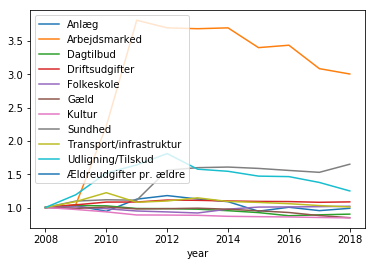

In [21]:
# Plotting by defining a function;
def plot(df):
    df_indexed = df.set_index('year') # Set year as index
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nglk_true_alt)

And we see that even when scaled by the first observation, the municipalities have witnessed a great increase in expenses concerning labour market activities. Dropping this variable from the above plot as it blurs the development in the rest of the variables, we get the following:

In [22]:
# a. Make a copy of nglk_true_alt;
nglk_true_altny=nglk_true_alt.copy() 

# b. Dropping observations with respect to the variable 'Arbejdsmarked'
for val in ['Arbejdsmarked']: 
    I = nglk_true_altny.variable.str.contains(val)
    nglk_true_altny = nglk_true_altny.loc[I == False] # keep everything else
    
# c. Overview:    
nglk_true_altny.head(10) 


,municipality,variable,unit,year,Measure,value,indexed
0,Hele landet,Anlæg,real,2008,Nettoudgifter,2471.0,1.000000
4,Hele landet,Dagtilbud,real,2008,Nettoudgifter,43397.0,1.000000
6,Hele landet,Driftsudgifter,real,2008,Nettoudgifter,54664.0,1.000000
8,Hele landet,Folkeskole,real,2008,Nettoudgifter,66472.0,1.000000
10,Hele landet,Kultur,real,2008,Nettoudgifter,1868.0,1.000000
12,Hele landet,Gæld,real,2008,Nettoudgifter,16644.0,1.000000
14,Hele landet,Sundhed,real,2008,Nettoudgifter,3208.0,1.000000
16,Hele landet,Transport/infrastruktur,real,2008,Nettoudgifter,1449.0,1.000000
18,Hele landet,Udligning/Tilskud,real,2008,Nettoudgifter,-10383.0,1.000000
20,Hele landet,Anlæg,real,2009,Nettoudgifter,2540.0,1.027924


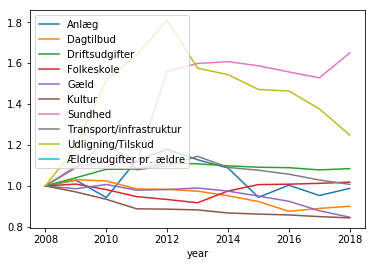

In [23]:
# And plotting again - now without 'Arbejdsmarked' yields;
plot(nglk_true_altny)

And we know see that also 'Udligning og Tilskud/equalization and grants' to the municipalities and health care cost have increased relatively much over the 9 years, though at their highest around 2012. At the same time many other expenses seems to have been relatively stable with some having a negative trend. 

To get a deeper look into each expense type, they are visualized interactively below: 

In [24]:
#  Create a interactive plot for each expense type accross municipalities.

# a) define af simple function for plot;
def plot_d(dataframe,variable): 
    I = dataframe['variable'] == variable
    ax=dataframe.loc[I,:].plot(x='year', y='value', style='-o', legend='False')
    ax.set_title('Development in key expense figure pr. capita accros municipalities (Netto)')
    ax.set_ylabel('Expenditure (netto) pr. capita (kr.)')
    
# c) creating the interactively plot
widgets.interact(plot_d, 
    dataframe = widgets.fixed(nglk_true),  
    #municipality = widgets.Dropdown(description='municipality', options=nglk_true.municipality.unique(), value='Hele landet'),            
    variable = widgets.Dropdown(description='variable', options=nglk_true.variable.unique(), value='Anlæg')                
);

interactive(children=(Dropdown(description='variable', options=('Anlæg', 'Arbejdsmarked', 'Dagtilbud', 'Drifts…

And we see that some expense types have increased, while others have decreased. capital expenditures ('Anlæg') have increased, while culture expenses ('Kultur') have decreased rapidly, and expenses to the elementary school('Folkeskolen') have a great variation. In general there seem to have been big changes around 2012, and we should pay attention to changes in the definition of the variable over years, which could make comparisons between years rather difficult. For instance can the rapid increase in the expenses to health care('Sundhed') in 2012 be explained by the fact that there was a reorganization of the municipalities co-financing of the health services. Similar reservations can be applied to other variables.

## Covariation between long-term debt and population:

In order to analyze the covariation between population growth and the municaplities debt-level growth, we first merge the datasets 'pop_long' and 'debt_long'.

## Merge Datasets:

In [25]:
full = pd.merge(debt_long, pop_long, how='inner',on=['municipality','year'])
full = full.drop(columns=['municipality2_x','municipality2_y']) # Drop the columns used in part 1 for a second municipality.

full.head(10)

,municipality,year,debt,population
0,Hele landet,2008,16644.0,5475791
1,København,2008,12106.0,509861
2,Frederiksberg,2008,28300.0,93444
3,Dragør,2008,16222.0,13261
4,Tårnby,2008,83.0,40016
5,Albertslund,2008,18424.0,27602
6,Ballerup,2008,17584.0,47116
7,Brøndby,2008,12950.0,33831
8,Gentofte,2008,8719.0,68913
9,Gladsaxe,2008,15269.0,62562


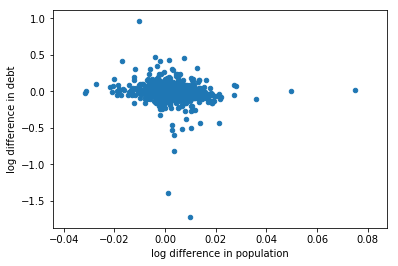

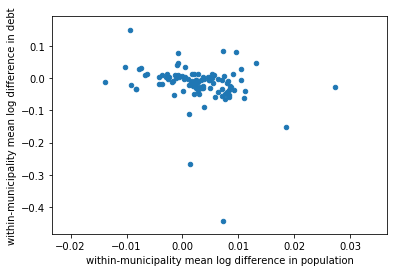

In [26]:
# a. Sort the dataset by municipality and year.
full.sort_values(['municipality','year'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_debt'] =  np.log(full['debt'])

# c. figur 1: log differences
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_debt', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in debt')

# c. figur 2: mean log differences
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_debt', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in debt'); 

And we see that there does not seem to be any large correlation/covariation between the change/growth in municipalities population and their debt level. 

A priori we could rationalize both a positive and negativ relationsship. A larger population could yield a lower debt level pr. capita if the municipality experience some positive scale effects by having a large population. Hence this could free some economic resources, which can be used to reduce the debt level. Hence a negative relationship.

However the above graphs suggest, that there is no such relationsship. And the municipalities growth in debt - level is explained by other factors than the population growth. This will however not be covered in this notebook. 


## Covariation between Operating expenses and population:

As we did not find any strong covariation between growth in the long-term debt and population. We will now briefly investigate if there is a more clear covariation between population and operating expenses pr. capita.

### Merging data for population and operating expenses.

In [27]:
Merged = pd.merge(OP_long, pop_long, how='inner',on=['municipality','year'])
Merged = Merged.drop(columns=['municipality2']) # Drop the columns used in part 1 for a second municipality.
Merged.head(10)

,municipality,year,operating,population
0,København,2008,58650.0,509861
1,Frederiksberg,2008,50937.0,93444
2,Dragør,2008,53904.0,13261
3,Tårnby,2008,52568.0,40016
4,Albertslund,2008,70085.0,27602
5,Ballerup,2008,65830.0,47116
6,Brøndby,2008,67322.0,33831
7,Gentofte,2008,51140.0,68913
8,Gladsaxe,2008,56858.0,62562
9,Glostrup,2008,62041.0,20673


We note that as we have used 'inner join' to merge the two datasets, the rows for the whole country ('Hele landet') in the population data is not a part of the merged dataset. This is because there is no rows for 'Hele landet' in the dataset 'OP_long'. So since'inner join' does not contain any rows which are not in both datasets, the rows for the whole country is not in the merged dataset.

Below we plot the covariation. Exactly as done before.

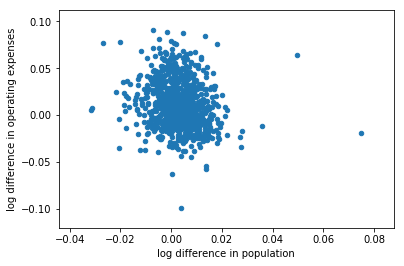

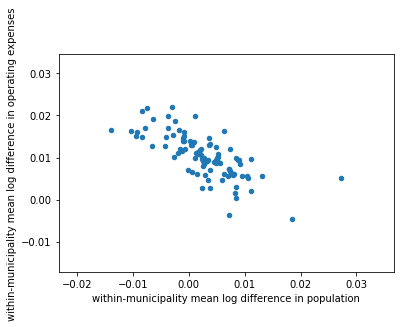

In [28]:
# a. Sort the dataset by municipality and year.
Merged.sort_values(['municipality','year'], inplace=True)

# b. take logs
Merged['log_population'] =  np.log(Merged['population'])
Merged['log_operating'] =  np.log(Merged['operating'])

# c. figur 1: log differences
ax = Merged.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_operating', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in operating expenses')

# c. figur 2: mean log differences
ax = Merged.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_operating', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in operating expenses'); 

And looking at the plot at the bottom, we can see a tendency, that there is a negative covariation between the population growth and growth in operating expenses, when we use the within-municipality growth.

# Conclusion

We have in this project analysed the development in key expense figures accross and in between municipalities in Denmark over the period 2008 to 2018. We have shown that the long-term debt level accross municipalities has decreased, but there is a large variaiton between years and municipalities. Secondly we have investigated a broader range of expense figures for the municipalities, and as it is shown the development in the variables are fairly diverse with a great variation. We have discovered that there has been several changes in the municipalities account plan, which make in between year comparisons difficult.